
# Определение перспективного тарифа для телеком компании
<a id="start"></a>


В компании «Мегалайн» — федерального оператора сотовой связи клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов
Тариф «Смарт»
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
•	минута разговора: 3 рубля
•	сообщение: 3 рубля
•	1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
•	минута разговора: 1 рубль
•	сообщение: 1 рубль
•	1 Гб интернет-трафика: 150 рублей
Обратите внимание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута



### Оглавление: <a id="toc"></a>

1. [Открытие данных](#15)
2. [Предобработка](#25)
3. [Обогащение данных](#35)
4. [Исследовательский анализ данных](#45)
5. [Общий вывод](#55)


**Описание данных**

**Таблица users (информация о пользователях):**
<br>•	user_id — уникальный идентификатор пользователя
<br>•	first_name — имя пользователя
<br>•	last_name — фамилия пользователя
<br>•	age — возраст пользователя (годы)
<br>•	reg_date — дата подключения тарифа (день, месяц, год)
<br>•	churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
<br>•	city — город проживания пользователя
<br>•	tariff — название тарифного плана

**Таблица calls (информация о звонках):**
<br>•	id — уникальный номер звонка
<br>•	call_date — дата звонка
<br>•	duration — длительность звонка в минутах
<br>•	user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**
<br>•	id — уникальный номер сообщения
<br>•	message_date — дата сообщения
<br>•	user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**
<br>•	id — уникальный номер сессии
<br>•	mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
<br>•	session_date — дата интернет-сессии
<br>•	user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**
<br>•	tariff_name — название тарифа
<br>•	rub_monthly_fee — ежемесячная абонентская плата в рублях
<br>•	minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
<br>•	messages_included — количество сообщений в месяц, включённых в абонентскую плату
<br>•	mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
<br>•	rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
<br>•	rub_per_message — стоимость отправки сообщения сверх тарифного пакета
<br>•	rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Шаг 1. Откройте файл с данными и изучите общую информацию.  <a id="15"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from scipy import stats as st

users.csv  calls.csv internet.csv  messages.csv  tariffs.csv

In [2]:
try:
    users = pd.read_csv('users.csv')
    calls = pd.read_csv('calls.csv')
    messages = pd.read_csv('messages.csv')
    tariffs = pd.read_csv('tariffs.csv')
    internet = pd.read_csv('internet.csv')
    
except:
    print('Не удалось загрузить данные')

In [3]:
len(internet)+len(calls)+len(messages)

475039

In [4]:
#посмотрим что данные корректно загрузились, и предварительно оценим их
display(users.tail())
display(calls.tail())
display(messages.tail())
display(internet.tail())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


,id,call_date,duration,user_id
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


,id,message_date,user_id
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


,Unnamed: 0,id,mb_used,session_date,user_id
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


In [5]:
#приведем наименования столбцов у звоников и смс к единообразному виду
calls.set_axis(['id', 'event_date', 'duration', 'user_id'],inplace=True,axis=1)
messages.set_axis(['id', 'event_date', 'user_id'],inplace=True,axis=1)
internet.set_axis(['Unnamed', 'id', 'mb_used', 'event_date', 'user_id'],inplace=True,axis=1)

#смотрим нет ли NaN в таблице со звонками, и интернетом если нет - то это упростит нам задачу слияния
print(calls['duration'].isnull().sum())
print(internet['mb_used'].isnull().sum())

print(calls.columns,len(calls))
print(messages.columns,len(messages))
#display(len(pd.concat([calls,messages],ignore_index=True)))
#увидим, что есть совпадения по id, но этот id нам не нужен для анализа.
#Поэтому можно смело удалить столбец
df = pd.concat([calls,messages],ignore_index=True)
df = pd.concat([df,internet],ignore_index=True)
#проклассифицируем событие как звонок,смс, интернет
df.loc[df['duration'].isnull(),'type_event'] = 'message'
df.loc[~df['duration'].isnull(),'type_event'] = 'call'
df.loc[~df['mb_used'].isnull(),'type_event'] = 'internet'

#столбец 'Unnamed' не несет информативности, поэтому удалим его
display(df['id'].value_counts())
df.drop(['Unnamed'],axis='columns',inplace=True)
display(df)
#display(len(pd.concat([calls,messages],ignore_index=True)))

0
0
Index(['id', 'event_date', 'duration', 'user_id'], dtype='object') 202607
Index(['id', 'event_date', 'user_id'], dtype='object') 123036


1200_125    3
1407_71     3
1358_38     3
1174_286    3
1402_262    3
           ..
1112_354    1
1195_103    1
1201_339    1
1441_160    1
1363_859    1
Name: id, Length: 237279, dtype: int64

,id,event_date,duration,user_id,mb_used,type_event
0,1000_0,2018-07-25,0.00,1000,NaN,call
1,1000_1,2018-08-17,0.00,1000,NaN,call
2,1000_2,2018-06-11,2.85,1000,NaN,call
3,1000_3,2018-09-21,13.80,1000,NaN,call
4,1000_4,2018-12-15,5.18,1000,NaN,call
...,...,...,...,...,...,...
475034,1499_152,2018-10-03,NaN,1499,318.90,internet
475035,1499_153,2018-12-14,NaN,1499,490.13,internet
475036,1499_154,2018-10-27,NaN,1499,0.00,internet
475037,1499_155,2018-11-26,NaN,1499,1246.32,internet


Посмотрев на содержание таблиц, решили действовать по следующему алгоритму:
- приводим заголовки таблиц звонков и смс, интернет к единому наименованию 
- проверяем время звонков и интернета на NaN (NaN в таблице со звноками и интернетом не оказалось - это поможет нам классифицировать звонки и смс,интернет в новой таблице)
- сливаем таблицы
- обогащаем данные, где `duration`!=NaN, значит это звонки. А если значение  пропущено - то смс. Такая же ситуация с интергентом `mb_used`!=NaN

Интересно замететить что остался столбец 'id'. На первый взгляд он не несет информативности, т.е. в разных таблицах он значил: `'уникальный номер сессии','уникальный номер сообщения','уникальный номер звонка'.` Но в некоторых случаях, почему то этот номер совпал в таблицах, а в некоторых нет. Понятно что в каждой таблице количество 'id'(порядковых номеров) разное, т.к. размерность разная. Но мы не знаем как собирали данные, поэтому оставим пока этот столбец, возможно в нем есть "глубинный смысл".



In [6]:
df = df.merge(users,how='left',on='user_id')
#???можно ли поменять заголовок только в одной колонке, не перечислсяя
tariffs.set_axis(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
        'tariff'],axis=1,inplace=True)
df = df.merge(tariffs,how='left',on='tariff')
display(df)

,id,event_date,duration,user_id,mb_used,type_event,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000_0,2018-07-25,0.00,1000,NaN,call,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000_1,2018-08-17,0.00,1000,NaN,call,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000_2,2018-06-11,2.85,1000,NaN,call,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000_3,2018-09-21,13.80,1000,NaN,call,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000_4,2018-12-15,5.18,1000,NaN,call,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475034,1499_152,2018-10-03,NaN,1499,318.90,internet,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
475035,1499_153,2018-12-14,NaN,1499,490.13,internet,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
475036,1499_154,2018-10-27,NaN,1499,0.00,internet,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
475037,1499_155,2018-11-26,NaN,1499,1246.32,internet,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3


Мы взяли таблицы с минутами, интернетом, смс - склеили их, и объединили с таблицей пользователи и тариф. Теперь мы знаем кто когда и сколько звонил, когда отправлял сообщения,заходил в интернет и по какому тарифу это все тарфицировалось.

Столбцы с пропущенными значениями присутствуют, но они обьяснянются "природой" датасэта.
Т.е. является нормальным, что у звноков нету количества мегабайт, и что не все клиенты закрывали тариф. 
Заполнять пропуски не требуется.
> Попробуем выделить ключевые признаки в нашем датасэте,
обратим на них особое внимание при анализе статистических показателей:
- duration - длительность звонка в минутах
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- age — возраст пользователя (годы)
- city - город проживания пользователя


In [7]:
df[['duration','mb_used','age']].describe().T

,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3000,6.000,10.7000,38.00
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
age,475039.0,46.914338,16.668630,18.0,32.0000,47.000,62.0000,75.00


In [8]:
df.query('duration!=0 and mb_used!=0')[['duration','mb_used','age']].describe()


,duration,mb_used,age
count,162994.000000,129798.000000,415828.000000
mean,8.397794,426.087210,46.888283
std,5.353022,255.596447,16.695772
min,0.010000,0.030000,18.000000
25%,4.170000,227.460000,32.000000
50%,7.740000,400.540000,47.000000
75%,11.850000,592.947500,62.000000
max,38.000000,1724.830000,75.000000


> Кратко проанализируем количественные значения столбцов:
- duration - длительность звонка в минутах `(среднее (8.4 минуты) почти  совпадает с медианой(7.74 минуты), что говорит о том что распределение близко к нормальному. Максимальное значение в 38 минут вполне реально, но неужели никто не говорил дольше?)`
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)`(среднее почти совпадает с медианой, что говорит о том что распределение близко к нормальному. )`
- age — возраст пользователя (годы)`Средний возраст 47 лет, немного странно. Конечно телефоны есть у всех, но продолжительность жизни у нас в стране не на столько высокая, может внуки оформляют симки на своих бабушек и дедушек?`

### Шаг 2. Предобработка данных.  <a id="15"></a>

In [9]:
df['id'] = df['id'].astype('category')
df['event_date'] = pd.to_datetime(df['event_date'],format='%Y-%m-%d')	
df['duration'] = df['duration'].astype('float16')
df['user_id'] = df['user_id'].astype('uint32')
df['mb_used'] = df['mb_used'].astype('float16')
df['type_event'] = df['type_event'].astype('category')
df['age'] = df['age'].astype('uint8')
df['churn_date'] = pd.to_datetime(df['churn_date'],format='%Y-%m-%d')
df['city'] = df['city'].astype('category')
df['first_name'] = df['first_name'].astype('category')
df['last_name'] = df['last_name'].astype('category')
df['reg_date'] = pd.to_datetime(df['reg_date'],format='%Y-%m-%d')
df['tariff'] = df['tariff'].astype('category')
df['messages_included'] = df['messages_included'].astype('uint16')
df['mb_per_month_included'] = df['mb_per_month_included'].astype('uint16')
df['minutes_included'] = df['minutes_included'].astype('uint16')
df['rub_monthly_fee'] = df['rub_monthly_fee'].astype('uint16')
df['rub_per_gb'] = df['rub_per_gb'].astype('uint16')
df['rub_per_message'] = df['rub_per_message'].astype('uint8')
df['rub_per_minute'] = df['rub_per_minute'].astype('uint8')

У нас есть информация, что «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. 

In [10]:
# округлим значения минут и мегабайтов
df['mb_used_round']= df['mb_used'].apply(np.ceil)
df['duration_round']= df['duration'].apply(np.ceil)

In [11]:
# посчитаем среднее время с учетом пропущенных звонков и без
_sr1 = df.groupby('user_id')['duration'].mean()
_sr2 = df.query('duration!=0').groupby('user_id')['duration'].mean()
df_user_grop = pd.concat([_sr1,_sr2],axis=1)
df_user_grop.set_axis(['duration','duration_no_zero'],axis='columns',inplace=True)
#покажем на сколько процентов среднее время по каждому пользоваетлю выше 
df_user_grop['ratio'] = ((df_user_grop['duration_no_zero']/df_user_grop['duration'] -1)*100).round(1)
#у кого то много входящих пропущенных звонков
display(df_user_grop['ratio'].sort_values(ascending=False))

user_id
1257    100.00000
1181     47.18750
1398     43.18750
1016     42.90625
1373     41.18750
          ...    
1106          NaN
1231          NaN
1328          NaN
1473          NaN
1489          NaN
Name: ratio, Length: 498, dtype: float16

In [12]:
#посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам;
df_pivot = pd.pivot_table(df,index=['user_id'],values = ['age','duration_round'],aggfunc='count')
df_pivot.rename(columns={"age":"count"},inplace=True)
display(df_pivot)

,count,duration_round
user_id,,
1000,1075,368
1001,218,122
1002,656,217
1003,1004,520
1004,1668,176
...,...,...
1495,1159,565
1496,2130,828
1497,373,201


In [13]:
# посчитаем сколько смс было отправлено каждым пользоваелем за весь период и по месяцам
display(df.query('type_event=="message"')['user_id'].value_counts())
df['event_month'] = pd.DatetimeIndex(df['event_date']).month_name(locale = 'Russian')

df_pivot_mess= pd.pivot_table(df,index=['user_id','event_month'],values = ['mb_used_round'],aggfunc='count')
#.\sort_values(by='mb_used_round',ascending=False)
display(df_pivot_mess)

1277    1463
1089    1408
1231    1384
1385    1380
1356    1224
        ... 
1389       6
1279       5
1074       3
1159       2
1141       1
Name: user_id, Length: 426, dtype: int64

mb_used_round
user_id event_month               
1000    Август                  29
        Декабрь                 21
        Июль                    29
        Июнь                    49
        Май                      5
...                            ...
1498    Сентябрь                78
1499    Декабрь                 45
        Ноябрь                  49
        Октябрь                 58
        Сентябрь                 5

[3214 rows x 1 columns]

In [14]:
# посчитаем объем израсходованного интернет-трафика по месяцам;
#Добавим дополнительный признак - месяц
#df_pivot_month= pd.pivot_table(df,index=['user_id','event_month'],values = ['mb_used_round'],aggfunc='count')
#.\sort_values(by='mb_used_round',ascending=False)
_df = pd.pivot_table(df,index=['user_id'],columns = 'event_month',values = ['mb_used_round'],aggfunc='count')
display(_df)

mb_used_round                                                \
event_month        Август Апрель Декабрь  Июль  Июнь   Май  Март Ноябрь   
user_id                                                                   
1000                 29.0    NaN    21.0  29.0  49.0   5.0   NaN   24.0   
1001                  NaN    NaN    41.0   NaN   NaN   NaN   NaN   55.0   
1002                 60.0    NaN    62.0  58.0  34.0   NaN   NaN   55.0   
1003                 15.0    NaN    21.0   NaN   NaN   NaN   NaN   21.0   
1004                 52.0    NaN    40.0  35.0  35.0  24.0   NaN   36.0   
...                   ...    ...     ...   ...   ...   ...   ...    ...   
1495                  4.0    NaN    47.0   NaN   NaN   NaN   NaN   71.0   
1496                 67.0   69.0    68.0  68.0  69.0  75.0  76.0   83.0   
1497                  NaN    NaN    47.0   NaN   NaN   NaN   NaN   43.0   
1498                 76.0    NaN     NaN  19.0   NaN   NaN   NaN    NaN   
1499                  NaN    NaN    45.0   NaN   NaN   NaN   NaN   49.0   

                                             
event_month Октябрь Сентябрь Февраль Январь  
user_id                                      
1000           27.0     27.0     NaN    NaN  
1001            NaN      NaN     NaN    NaN  
1002           44.0     56.0     NaN    NaN  
1003           25.0     22.0     NaN    NaN  
1004           41.0     37.0     NaN    NaN  
...             ...      ...     ...    ...  
1495           63.0     69.0     NaN    NaN  
1496           84.0     81.0    82.0   12.0  
1497           31.0      NaN     NaN    NaN  
1498           59.0     78.0     NaN    NaN  
1499           58.0      5.0     NaN    NaN  

[498 rows x 12 columns]

In [15]:
# рассчитаем ежемесячные показатели каждого пользователя
df.loc[df['type_event']=='message','is_message']=1
df.loc[df['type_event']!='message','is_message']=0
#_df = pd.pivot_table(df,index=['user_id'],columns = 'event_month',values = ['duration_round','is_message','mb_used_round'],aggfunc='count')
_df_pivot = df.groupby(['user_id','event_month'])['duration_round','is_message','mb_used_round'].sum();
_df_pivot=pd.DataFrame(_df_pivot.to_records())
display(_df_pivot)

<ipython-input-15-2c62576afcb2>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df_pivot = df.groupby(['user_id','event_month'])['duration_round','is_message','mb_used_round'].sum();


,user_id,event_month,duration_round,is_message,mb_used_round
0,1000,Август,408.0,81.0,14064.0
1,1000,Декабрь,333.0,70.0,9824.0
2,1000,Июль,340.0,75.0,14016.0
3,1000,Июнь,172.0,60.0,23248.0
4,1000,Май,159.0,22.0,2256.0
...,...,...,...,...,...
3209,1498,Сентябрь,471.0,44.0,22160.0
3210,1499,Декабрь,492.0,66.0,13072.0
3211,1499,Ноябрь,612.0,59.0,17984.0
3212,1499,Октябрь,449.0,48.0,17808.0


In [16]:
_df_pivot = _df_pivot.merge(users[['user_id','tariff']],on ='user_id', how='left')
_df_pivot = _df_pivot.merge(tariffs,on ='tariff', how='left')
final_pivot = _df_pivot.copy()
final_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int32  
 1   event_month            3214 non-null   object 
 2   duration_round         3214 non-null   float16
 3   is_message             3214 non-null   float64
 4   mb_used_round          3214 non-null   float16
 5   tariff                 3214 non-null   object 
 6   messages_included      3214 non-null   int64  
 7   mb_per_month_included  3214 non-null   int64  
 8   minutes_included       3214 non-null   int64  
 9   rub_monthly_fee        3214 non-null   int64  
 10  rub_per_gb             3214 non-null   int64  
 11  rub_per_message        3214 non-null   int64  
 12  rub_per_minute         3214 non-null   int64  
dtypes: float16(2), float64(1), int32(1), int64(7), object(2)
memory usage: 301.3+ KB


In [17]:
_df_pivot['internet_exceed'] = _df_pivot['mb_used_round'] -_df_pivot['mb_per_month_included']  
_df_pivot['minutes_exceed'] = _df_pivot['duration_round'] -_df_pivot['minutes_included'] 
_df_pivot['messages_exceed'] = _df_pivot['is_message'] -_df_pivot['messages_included'] 
_df_pivot.loc[_df_pivot['messages_exceed']<0,'messages_exceed'] = 0#np.nan
_df_pivot.loc[_df_pivot['minutes_exceed']<0,'minutes_exceed'] = 0
_df_pivot.loc[_df_pivot['internet_exceed']<0,'internet_exceed'] = 0
#оставим только месяца, минуты, интернет с превышением 
#_df_pivot=_df_pivot.query('messages_exceed>0 or minutes_exceed >0 or internet_exceed >0')  
#_df_pivot['messages_exceed'] = _df_pivot['is_message'] -_df_pivot['messages_included'] 
display(_df_pivot[-20:]) 

,user_id,event_month,duration_round,is_message,mb_used_round,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,internet_exceed,minutes_exceed,messages_exceed
3194,1496,Июль,582.0,42.0,24384.0,smart,50,15360,500,550,200,3,3,9024.0,82.0,0.0
3195,1496,Июнь,555.0,35.0,20160.0,smart,50,15360,500,550,200,3,3,4800.0,55.0,0.0
3196,1496,Май,484.0,40.0,23728.0,smart,50,15360,500,550,200,3,3,8368.0,0.0,0.0
3197,1496,Март,557.0,46.0,24976.0,smart,50,15360,500,550,200,3,3,9616.0,57.0,0.0
3198,1496,Ноябрь,662.0,46.0,25088.0,smart,50,15360,500,550,200,3,3,9728.0,162.0,0.0
3199,1496,Октябрь,450.0,35.0,28208.0,smart,50,15360,500,550,200,3,3,12848.0,0.0,0.0
3200,1496,Сентябрь,486.0,29.0,26960.0,smart,50,15360,500,550,200,3,3,11600.0,0.0,0.0
3201,1496,Февраль,594.0,45.0,28512.0,smart,50,15360,500,550,200,3,3,13152.0,94.0,0.0
3202,1496,Январь,48.0,9.0,3766.0,smart,50,15360,500,550,200,3,3,0.0,0.0,0.0
3203,1497,Декабрь,545.0,17.0,19936.0,smart,50,15360,500,550,200,3,3,4576.0,45.0,0.0


In [18]:
#вычислим сколько переплатил каждый пользователь за месяц и сколько он заплатил за связь в целом(помесячно
df_exceed = _df_pivot.copy()
df_exceed['rub_exceed'] = df_exceed['minutes_exceed']*df_exceed['rub_per_minute']+\
(df_exceed['internet_exceed']*df_exceed['rub_per_gb'])/1024+\
df_exceed['messages_exceed']*df_exceed['rub_per_message']
df_exceed['overall_pay'] = df_exceed['rub_monthly_fee']+df_exceed['rub_exceed']
df = df_exceed.copy()
display(df_exceed)

,user_id,event_month,duration_round,is_message,mb_used_round,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,internet_exceed,minutes_exceed,messages_exceed,rub_exceed,overall_pay
0,1000,Август,408.0,81.0,14064.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,0.000,1950.000
1,1000,Декабрь,333.0,70.0,9824.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,0.000,1950.000
2,1000,Июль,340.0,75.0,14016.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,0.000,1950.000
3,1000,Июнь,172.0,60.0,23248.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,0.000,1950.000
4,1000,Май,159.0,22.0,2256.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,0.000,1950.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,Сентябрь,471.0,44.0,22160.0,smart,50,15360,500,550,200,3,3,6800.0,0.0,0.0,1328.125,1878.125
3210,1499,Декабрь,492.0,66.0,13072.0,smart,50,15360,500,550,200,3,3,0.0,0.0,16.0,48.000,598.000
3211,1499,Ноябрь,612.0,59.0,17984.0,smart,50,15360,500,550,200,3,3,2624.0,112.0,9.0,875.500,1425.500
3212,1499,Октябрь,449.0,48.0,17808.0,smart,50,15360,500,550,200,3,3,2448.0,0.0,0.0,478.125,1028.125


In [19]:
#мы заметили что упустили  важные признаки по пользователям из таблицы users, восполним этот момент
#Фамилию и имя включать не будем. Потенциально можно было посмотреть поведение пользователей в разрезе 
#мужчины/женщины но в рамках данной задачи мы не будем этого делать
df = df.merge(users[['user_id','age', 'churn_date', 'city','reg_date']],on ='user_id', how='left')
display(df)

,user_id,event_month,duration_round,is_message,mb_used_round,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,...,rub_per_minute,internet_exceed,minutes_exceed,messages_exceed,rub_exceed,overall_pay,age,churn_date,city,reg_date
0,1000,Август,408.0,81.0,14064.0,ultra,1000,30720,3000,1950,...,1,0.0,0.0,0.0,0.000,1950.000,52,NaN,Краснодар,2018-05-25
1,1000,Декабрь,333.0,70.0,9824.0,ultra,1000,30720,3000,1950,...,1,0.0,0.0,0.0,0.000,1950.000,52,NaN,Краснодар,2018-05-25
2,1000,Июль,340.0,75.0,14016.0,ultra,1000,30720,3000,1950,...,1,0.0,0.0,0.0,0.000,1950.000,52,NaN,Краснодар,2018-05-25
3,1000,Июнь,172.0,60.0,23248.0,ultra,1000,30720,3000,1950,...,1,0.0,0.0,0.0,0.000,1950.000,52,NaN,Краснодар,2018-05-25
4,1000,Май,159.0,22.0,2256.0,ultra,1000,30720,3000,1950,...,1,0.0,0.0,0.0,0.000,1950.000,52,NaN,Краснодар,2018-05-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,Сентябрь,471.0,44.0,22160.0,smart,50,15360,500,550,...,3,6800.0,0.0,0.0,1328.125,1878.125,68,2018-10-25,Владикавказ,2018-07-19
3210,1499,Декабрь,492.0,66.0,13072.0,smart,50,15360,500,550,...,3,0.0,0.0,16.0,48.000,598.000,35,NaN,Пермь,2018-09-27
3211,1499,Ноябрь,612.0,59.0,17984.0,smart,50,15360,500,550,...,3,2624.0,112.0,9.0,875.500,1425.500,35,NaN,Пермь,2018-09-27
3212,1499,Октябрь,449.0,48.0,17808.0,smart,50,15360,500,550,...,3,2448.0,0.0,0.0,478.125,1028.125,35,NaN,Пермь,2018-09-27


Мы подготовили данные для дальнейшей обработки. 
- Агрегировав разарозненные данные и добавив новыеметрики: количество звонков, минут, гигабайт за месяц для каждого пользователя. 
- Посчитали сколько переплачивает каждый месяц пользователь
- Сколько пользователь платит в ообщем с учетом абонентской платы по тарифу.

<font color='blue'><b>Комментарий ревьювера</b></font> \
<font color='green'>Хорошо, переходим к анализу

### Шаг 3. Анализ данных.  <a id="25"></a>

Опишeм поведение клиентов оператора, исходя из выборки. Выясним Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение. Построем гистограммы. Опишем распределения.

<AxesSubplot:>

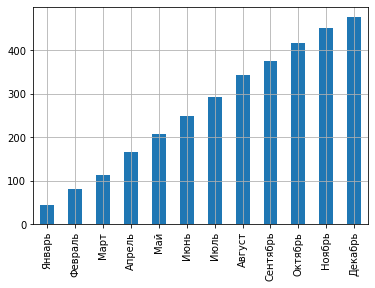

In [20]:
#в ходе обработки мы заметили что не у всех пользователей есть данные за год.
#Прикинем примерно за какие месяцы перед нами выборка, чтобы далее корректно интерпретировать результаты
df['event_month'].value_counts().sort_values().plot(kind='bar',grid='True')#rot=0

 Заметим, что база активных пользователей только начинает расти.

<AxesSubplot:title={'center':'Количество месяцев и пользователей'}, xlabel='количество месяцев', ylabel='Количество пользователей'>

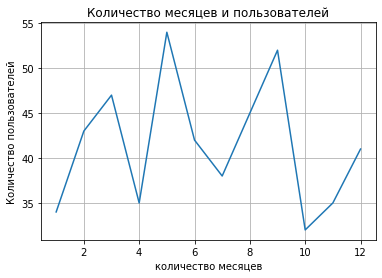

In [21]:
# посчитаем количество месяцев в году, что клиент пользовался связью. И выведем количество клиентов.
# По идее должно быть много людей которые постоянно пользуются (12) или очень мало (1-2) месяца
user_month_use = df.groupby('user_id')['event_month'].count().sort_values(ascending=False).value_counts().sort_index()
user_month_use.plot(kind='line',grid=True,title = 'Количество месяцев и пользователей',\
                    ylabel='Количество пользователей', xlabel ='количество месяцев')

Получается у компании нет еще постоянных клиентов (только 40 пользователей пользовались связью весь год),
но и сказать что пользователи покупают симки и сразу выкидывают - тоже нельзя. Скорее всего простоянные пользователи - в середине, т.к. пользуются связью не с начала года.

In [22]:
# посмотрим статистику по месяцам
#возьмем данные без учета входящих звонков
df_barplot = df[['user_id', 'event_month','tariff','duration_round','is_message','mb_used_round']]
column_names = ['duration_round','is_message','mb_used_round']
df_barplot[column_names] = np.array(df_barplot[column_names], dtype=float)
#заменим нули на nan чтобы небыло ошибор в рассчетах
df_barplot.replace(0,np.nan,inplace=True)
display(df_barplot[100:130])
print(df_barplot['duration_round'].isin([np.inf, -np.inf]).value_counts())
print(df_barplot['mb_used_round'].isin([np.inf, -np.inf]).value_counts())
df_barplot.replace([np.inf, -np.inf], np.nan)
#df_barplot.replace(np.inf, 0,inplace=True)
print(df_barplot['duration_round'].isin([np.inf, -np.inf]).value_counts())
print(df_barplot['mb_used_round'].isin([np.inf, -np.inf]).value_counts())
#? почему-то при sum() дает значения inf
df_barplot = df_barplot.groupby(by=['event_month','tariff']).mean().sort_values(by='event_month')
#df_barplot.info()
display(df_barplot)
#display(df_barplot.pivot_table(index=['event_month','tariff'],values =['duration_round'], aggfunc='sum',fill_value="0" ))

<ipython-input-22-49e650877429>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barplot[column_names] = np.array(df_barplot[column_names], dtype=float)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

,user_id,event_month,tariff,duration_round,is_message,mb_used_round
100,1014,Август,smart,241.0,43.0,26048.0
101,1014,Декабрь,smart,175.0,53.0,25456.0
102,1014,Июль,smart,300.0,39.0,27840.0
103,1014,Июнь,smart,180.0,48.0,25056.0
104,1014,Май,smart,102.0,34.0,13064.0
105,1014,Ноябрь,smart,237.0,36.0,25136.0
106,1014,Октябрь,smart,332.0,51.0,22560.0
107,1014,Сентябрь,smart,250.0,48.0,25760.0
108,1015,Август,smart,394.0,68.0,27424.0
109,1015,Апрель,smart,11.0,3.0,738.0


False    3214
Name: duration_round, dtype: int64
False    3214
Name: mb_used_round, dtype: int64
False    3214
Name: duration_round, dtype: int64
False    3214
Name: mb_used_round, dtype: int64


user_id  duration_round  is_message  mb_used_round
event_month tariff                                                        
Август      smart   1248.123404      423.269231   38.750000   16697.367521
            ultra   1262.925234      535.813725   58.897727   19771.801887
Апрель      smart   1246.919643      370.441441   35.864583   13474.866071
            ultra   1268.054545      475.301887   44.512821   16837.345455
Декабрь     smart   1243.842730      479.985119   42.264808   18130.409496
            ultra   1264.136691      614.925373   72.008547   21964.543478
Июль        smart   1235.412935      408.353234   38.988506   15758.422886
            ultra   1263.351648      570.885057   62.136986   20736.133333
Июнь        smart   1232.908537      398.067485   38.577465   15809.292683
            ultra   1257.023810      497.469136   52.313433   19164.530120
Май         ultra   1257.686567      534.250000   48.769231   19971.569231
            smart   1239.269504      387.361702   39.032787   15820.106383
Март        smart   1256.792208      390.051948   35.550725   15119.168831
            ultra   1278.972973      489.648649   47.800000   17545.891892
Ноябрь      smart   1246.522152      436.647619   39.881481   16911.443038
            ultra   1263.253731      562.364341   66.159292   19947.759398
Октябрь     smart   1250.064626      427.590444   39.082677   16829.959044
            ultra   1255.910569      581.728814   69.776699   20221.245902
Сентябрь    smart   1251.873077      430.266409   39.219731   16318.846154
            ultra   1260.600000      563.963636   63.294737   19384.701754
Февраль     smart   1280.896552      298.689655   27.940000   11607.741379
            ultra   1293.125000      310.043478   32.937500   12853.409091
Январь      smart   1267.647059      210.030303   20.000000    8521.470588
            ultra   1295.333333      428.111111   43.428571   13150.333333

In [23]:
df_barplot = (pd.DataFrame(df_barplot.to_records()))
#df_barplot.reset_index(inplace=True)
df_barplot.drop(['user_id'],axis='columns',inplace=True)
#df_barplot.drop(['index'],axis='columns',inplace=True)
display(df_barplot)

,event_month,tariff,duration_round,is_message,mb_used_round
0,Август,smart,423.269231,38.750000,16697.367521
1,Август,ultra,535.813725,58.897727,19771.801887
2,Апрель,smart,370.441441,35.864583,13474.866071
3,Апрель,ultra,475.301887,44.512821,16837.345455
4,Декабрь,smart,479.985119,42.264808,18130.409496
5,Декабрь,ultra,614.925373,72.008547,21964.543478
6,Июль,smart,408.353234,38.988506,15758.422886
7,Июль,ultra,570.885057,62.136986,20736.133333
8,Июнь,smart,398.067485,38.577465,15809.292683
9,Июнь,ultra,497.469136,52.313433,19164.530120


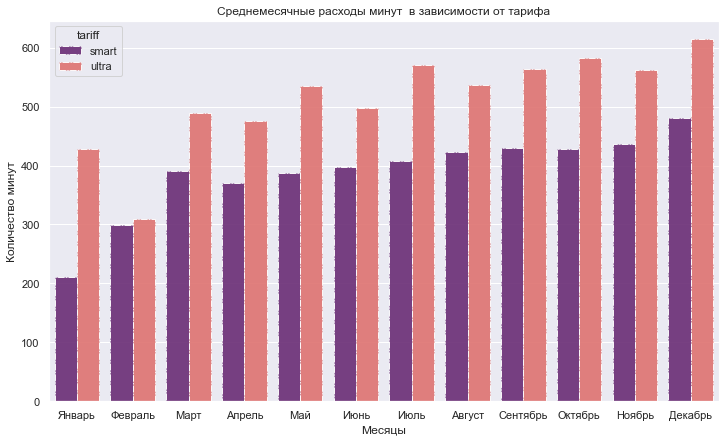

In [24]:
order_month = ['Январь','Февраль','Март','Апрель', 'Май','Июнь','Июль','Август','Сентябрь', 'Октябрь', 'Ноябрь',\
 'Декабрь']
order_tarif = ['smart', 'ultra']
sns.set()
plt.figure(figsize = (12,7))
ax = sns.barplot(data=df_barplot, x = 'event_month', y = 'duration_round',\
            hue = 'tariff', order=order_month,hue_order =order_tarif,\
            palette="magma",alpha =.9,linestyle = "-.") #estimator= np.max,ci = 20,n_boot=2  saturation=.6
ax.set(title = "Среднемесячные расходы минут  в зависимости от тарифа",
      xlabel = "Месяцы",
      ylabel = "Количество минут")
plt.show()

В январе и феврале абоненты говорили по телефону меньше. В январе с тарифом `смарт` говорили 200 минут, а с `ultra` 400. В феврале абоненты обоих тарифов говорили примерно одинаково. В среднем, разница между тарифами по месяцам составляет 100-150 минут

[Text(0.5, 1.0, 'Среднемесячные расходы смс в зависимости от тарифа'),
 Text(0.5, 0, 'Месяцы'),
 Text(0, 0.5, 'Количество смс')]

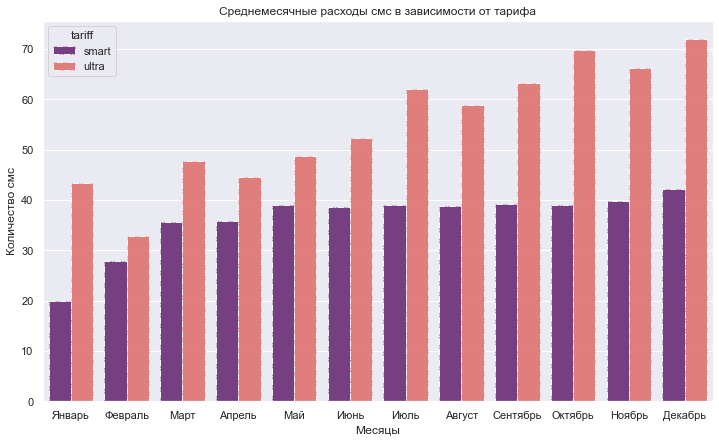

In [25]:
sns.set()
plt.figure(figsize = (12,7))
ax = sns.barplot(data=df_barplot, x = 'event_month', y = 'is_message',\
            hue = 'tariff', order=order_month,hue_order =order_tarif,\
            palette="magma",alpha =.9,linestyle = "-.") #estimator= np.max,ci = 20,n_boot=2  saturation=.6
ax.set(title = "Среднемесячные расходы смс в зависимости от тарифа",
      xlabel = "Месяцы",
      ylabel = "Количество смс")

Активность в первые месяцы опять проседает. Опять в январе пользователи тарифа `smart` показывают пониженную активность. Может у людей нет денег или они на отдыхе где не нужно отправлять смс. В среднем, на тарифе `ultra` отправляют на 10-30 смс больше чем на `smart`. К конц года разница начинает немного расти.

[Text(0.5, 1.0, 'Среднемесячные расходы на интернет в зависимости от тарифа'),
 Text(0.5, 0, 'Месяцы'),
 Text(0, 0.5, 'Количество мегабайт')]

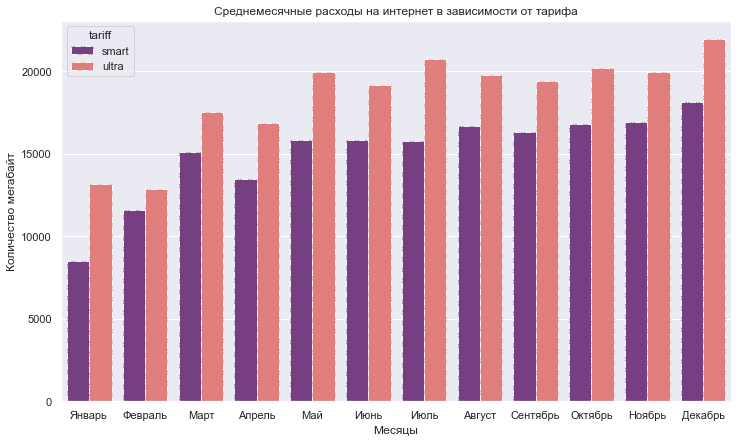

In [26]:
sns.set()
plt.figure(figsize = (12,7))
ax = sns.barplot(data=df_barplot, x = 'event_month', y = 'mb_used_round',\
            hue = 'tariff', order=order_month,hue_order =order_tarif,\
            palette="magma",alpha =.9,linestyle = "-.") #estimator= np.max,ci = 20,n_boot=2  saturation=.6
ax.set(title = "Среднемесячные расходы на интернет в зависимости от тарифа",
      xlabel = "Месяцы",
      ylabel = "Количество мегабайт")

По трафику по месяцам не такое заметное проседание. Может люди не могут отказать себе в социальных сетях. Но все же есть кому интернет нужен и по работе, поэтому январь-февраль небольшой спад активности. Как ни странно разница между тарифами 3-5 гигабайт. Может зря переплачивают пользователи тарифа `ultra`, а может кто-то из тарифа `smart` не правильно подобрал себе тариф и платит деньги за дополнительные гигабайты?

Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [27]:
df_hist = df.copy()
df_hist.replace(0,np.nan,inplace=True)
df_hist[column_names]=np.array(df_hist[column_names],dtype=float)
#df_barplot.replace([np.inf, -np.inf], np.nan)
display(df_hist)
#df_barplot = df_barplot.groupby(by=['event_month','tariff']).mean().sort_values(by='event_month')

,user_id,event_month,duration_round,is_message,mb_used_round,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,...,rub_per_minute,internet_exceed,minutes_exceed,messages_exceed,rub_exceed,overall_pay,age,churn_date,city,reg_date
0,1000,Август,408.0,81.0,14064.0,ultra,1000,30720,3000,1950,...,1,NaN,NaN,NaN,NaN,1950.000,52,NaN,Краснодар,2018-05-25
1,1000,Декабрь,333.0,70.0,9824.0,ultra,1000,30720,3000,1950,...,1,NaN,NaN,NaN,NaN,1950.000,52,NaN,Краснодар,2018-05-25
2,1000,Июль,340.0,75.0,14016.0,ultra,1000,30720,3000,1950,...,1,NaN,NaN,NaN,NaN,1950.000,52,NaN,Краснодар,2018-05-25
3,1000,Июнь,172.0,60.0,23248.0,ultra,1000,30720,3000,1950,...,1,NaN,NaN,NaN,NaN,1950.000,52,NaN,Краснодар,2018-05-25
4,1000,Май,159.0,22.0,2256.0,ultra,1000,30720,3000,1950,...,1,NaN,NaN,NaN,NaN,1950.000,52,NaN,Краснодар,2018-05-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,Сентябрь,471.0,44.0,22160.0,smart,50,15360,500,550,...,3,6800.0,NaN,NaN,1328.125,1878.125,68,2018-10-25,Владикавказ,2018-07-19
3210,1499,Декабрь,492.0,66.0,13072.0,smart,50,15360,500,550,...,3,NaN,NaN,16.0,48.000,598.000,35,NaN,Пермь,2018-09-27
3211,1499,Ноябрь,612.0,59.0,17984.0,smart,50,15360,500,550,...,3,2624.0,112.0,9.0,875.500,1425.500,35,NaN,Пермь,2018-09-27
3212,1499,Октябрь,449.0,48.0,17808.0,smart,50,15360,500,550,...,3,2448.0,NaN,NaN,478.125,1028.125,35,NaN,Пермь,2018-09-27


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


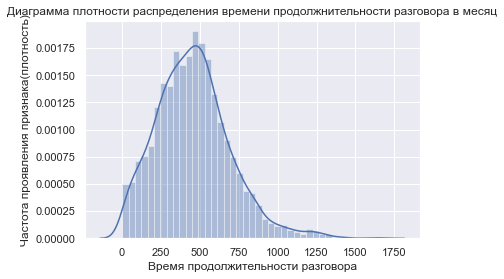

In [28]:
ax = sns.distplot(df_hist["duration_round"]);
ax.set(xlabel='Время продолжительности разговора',\
       ylabel= 'Частота проявления признака(плотность)',
      title = 'Диаграмма плотности распределения времени продолжнительности разговора в месяц');
plt.show();

 Распределение не похоже на нормальне и имеет тяжелый хвост

<font color='blue'><b>Комментарий ревьювера</b></font> \
<font color='green'>Да, распределение скошено

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


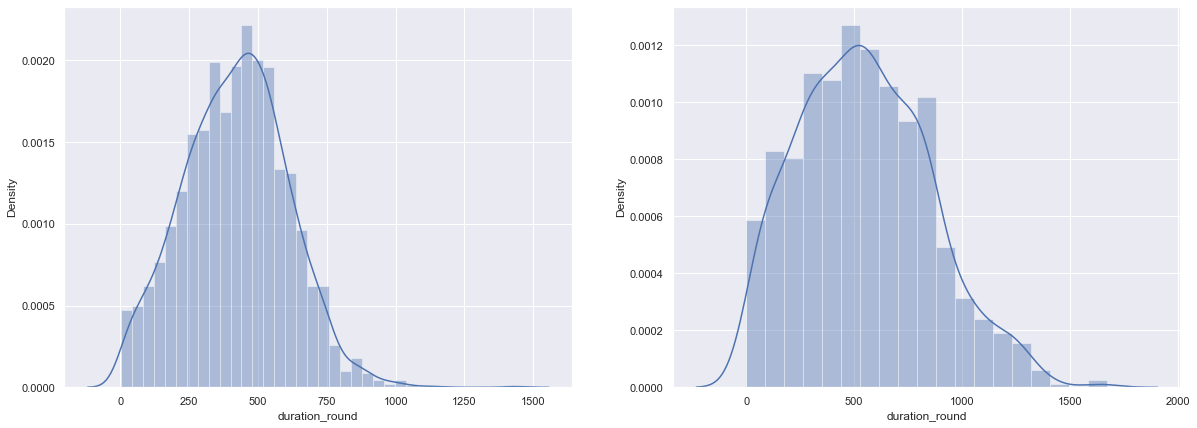

In [29]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))#

sns.distplot(df_hist[df_hist['tariff']=='smart']["duration_round"],ax=axes[0]);
ax.set(xlabel='Время продолжительности разговора',\
       ylabel= 'Частота проявления признака(плотность)',
      title = 'Диаграмма плотности распределения времени продолжнительности разговора в месяц');
sns.distplot(df_hist[df_hist['tariff']=='ultra']["duration_round"],ax=axes[1]);
ax.set(xlabel='Время продолжительности разговора ',\
       ylabel= 'Частота проявления значения(плотность)',
     title = 'Диаграмма плотности распределения времени продолжнительности разговора в месяц');
plt.show();

In [30]:
#Посчитаем дисперсию и Дисперсию и СКО по столбцам с минутами,смс и мегабайтами
def var_mean(_df,is_tarif):
    for column in column_names:
        variance = np.var(_df[column])
        std = np.std(_df[column])
        if is_tarif:
            print('Математическое ожиданиве в столбце {} равно {:.1f}'.format(column,_df[column].mean()))
        else: 
            print('СКО столбца {} равно {:.1f}'.format(column,std))    
        print('Дисперсся столбца {} равна {:.1f}'.format(column,variance))
var_mean(df_hist,False)        

СКО столбца duration_round равно 237.4
Дисперсся столбца duration_round равна 56352.1
СКО столбца is_message равно 35.0
Дисперсся столбца is_message равна 1228.1
СКО столбца mb_used_round равно 7509.8
Дисперсся столбца mb_used_round равна 56397620.0


- Дисперсся столбца duration_round равна 50216.6
- СКО столбца duration_round равно 224.1
- Дисперсся столбца is_message равна 1228.1
- СКО столбца is_message равно 35.0
- Дисперсся столбца mb_used_round равна 56325416.7
- СКО столбца mb_used_round равно 7505.0

In [31]:
print('Для тарифа ultra')
var_mean(df_hist[df_hist['tariff']=='ultra'],True)
print()
print('Для тарифа smart')
var_mean(df_hist[df_hist['tariff']=='smart'],True)

Для тарифа ultra
Математическое ожиданиве в столбце duration_round равно 547.8
Дисперсся столбца duration_round равна 93239.9
Математическое ожиданиве в столбце is_message равно 61.2
Дисперсся столбца is_message равна 2107.0
Математическое ожиданиве в столбце mb_used_round равно 19700.5
Дисперсся столбца mb_used_round равна 98580948.4

Для тарифа smart
Математическое ожиданиве в столбце duration_round равно 419.4
Дисперсся столбца duration_round равна 35702.0
Математическое ожиданиве в столбце is_message равно 38.7
Дисперсся столбца is_message равна 717.2
Математическое ожиданиве в столбце mb_used_round равно 16238.2
Дисперсся столбца mb_used_round равна 34300736.1


К сожалению по оценке средней и дисперсии мы не можем сделать выводы о равенстве средних значений двух генеральных совокупностей. Оно и понятно, тарифы разные.

In [32]:
#Посмотрим данные вне 2 и 3 сигм
def sigma_calc(_df):
    for column in column_names:
        for i in [1,2,3]:
            # посчитаем мат ожидание, СКО
            std_3 = i*(np.std(_df[column]))
            mean = _df[column].mean()
            mean_max = mean + std_3
            mean_min = mean -std_3
            outlier_3s=_df[(_df[column]>mean_max)|((_df[column]<mean_min))]
            #посчитаем не выбросы а наоборот сколько входит данных
            if i ==1:
                percent = 1-(outlier_3s.shape[0]/_df.shape[0])
            else: 
                percent = outlier_3s.shape[0]/_df.shape[0]
            #? в query можно передать название столбца? у меня ошибка
            #outlier_3s = df_hist.query('@column >@mean_max | @column<@mean_min').shape[0]
            print("Количество строк с выбросами по {} сигмам в столбце {} составило {} в % от выборки {:.1%}"\
                  .format(i,column,outlier_3s.shape[0],percent))
            # просто для эксперимента решил посчитать верноятность что данные попадут в 1,2,3 сигму
            #?  это корректно
            #print('Вероятность случайно встертить значение справа при сигма={} будет {:.1%}'\
             #     .format(i, distr.cdf(mean_min) - distr.cdf(mean_max)))
sigma_calc(df_hist)

Количество строк с выбросами по 1 сигмам в столбце duration_round составило 935 в % от выборки 70.9%
Количество строк с выбросами по 2 сигмам в столбце duration_round составило 110 в % от выборки 3.4%
Количество строк с выбросами по 3 сигмам в столбце duration_round составило 35 в % от выборки 1.1%
Количество строк с выбросами по 1 сигмам в столбце is_message составило 751 в % от выборки 76.6%
Количество строк с выбросами по 2 сигмам в столбце is_message составило 125 в % от выборки 3.9%
Количество строк с выбросами по 3 сигмам в столбце is_message составило 41 в % от выборки 1.3%
Количество строк с выбросами по 1 сигмам в столбце mb_used_round составило 906 в % от выборки 71.8%
Количество строк с выбросами по 2 сигмам в столбце mb_used_round составило 185 в % от выборки 5.8%
Количество строк с выбросами по 3 сигмам в столбце mb_used_round составило 27 в % от выборки 0.8%


- Количество выбросов по 2 сигмам в столбце duration_round `3.5%`
- Количество выбросов по 3 сигмам в столбце duration_round `1.1%`
- Количество выбросов по 2 сигмам в столбце is_message `3.9%`
- Количество выбросов по 3 сигмам в столбце is_message `1.3%`
- Количество выбросов по 2 сигмам в столбце mb_used_round `5.8%`
- Количество выбросов по 3 сигмам в столбце mb_used_round `0.8%`

Если посмотреть сколько % данных входит  в выборку, ограниченной одной сигмой
- в столбце duration_round 71%
- в столбце is_message 76,4%
- в столбце mb_used_round 71.8%
В целом не плохой результат, наши значения подпадают под правило 3-х сигм (практически все значения (около 99%) находятся в промежутке 3 sigma ).Решение о удалении выбросов будем принимать позднее, исходя из поставленных перед нами задач. 

In [33]:
sigma_calc(df_hist[df_hist['tariff']=='smart'])
print()
sigma_calc(df_hist[df_hist['tariff']=='ultra'])

Количество строк с выбросами по 1 сигмам в столбце duration_round составило 718 в % от выборки 67.8%
Количество строк с выбросами по 2 сигмам в столбце duration_round составило 88 в % от выборки 3.9%
Количество строк с выбросами по 3 сигмам в столбце duration_round составило 7 в % от выборки 0.3%
Количество строк с выбросами по 1 сигмам в столбце is_message составило 618 в % от выборки 72.3%
Количество строк с выбросами по 2 сигмам в столбце is_message составило 84 в % от выборки 3.8%
Количество строк с выбросами по 3 сигмам в столбце is_message составило 11 в % от выборки 0.5%
Количество строк с выбросами по 1 сигмам в столбце mb_used_round составило 635 в % от выборки 71.5%
Количество строк с выбросами по 2 сигмам в столбце mb_used_round составило 129 в % от выборки 5.8%
Количество строк с выбросами по 3 сигмам в столбце mb_used_round составило 8 в % от выборки 0.4%

Количество строк с выбросами по 1 сигмам в столбце duration_round составило 306 в % от выборки 68.9%
Количество строк 

0 duration_round
1 is_message
2 mb_used_round
3 overall_pay


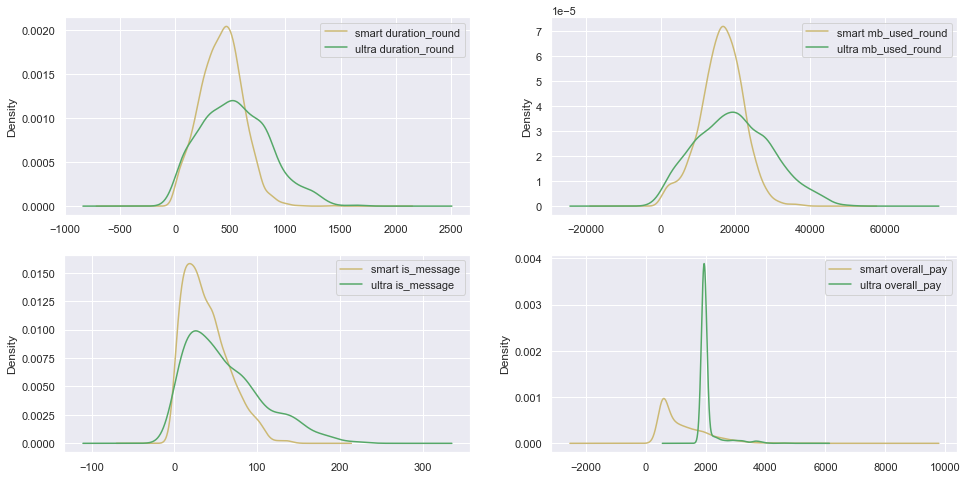

In [34]:
column_names_disp = ['duration_round','is_message','mb_used_round','overall_pay']
smart = df_hist[df_hist['tariff']=='smart']
ultra = df_hist[df_hist['tariff']=='ultra']
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
for i, col in enumerate(column_names_disp):
    print(i,col)
    smart[col].plot(ax=ax[i % 2][int(i / 2)], kind='density', label=f'smart {col}', color='y')
    ultra[col].plot(ax=ax[i % 2][int(i / 2)], kind='density', label=f'ultra {col}', color='g')
    ax[i % 2][int(i / 2)].legend()
plt.show()

__Сделаем небольшые выводы:__
- `Время разговора`. Распределения средних из выборок прмерно равны.
-- smart: Большинстро элемнтов стремится к мат ожиданию(МО). Т.е. разбросанность данных меньше чем у ultra.Небольшая скошенность в право.
-- ultra: Небольшая скошенность в право.
- `CMC`Распределения средних из ultra немного смещенов вправо.
-- smart:Большинстро элемнтов стремится к мат ожиданию(МО). Т.е. разбросанность данных меньше чем у ultra.Скошенности нет, но слева небольшие заломы. Возможно это контраст с пользователями которые оч. редко отправляют смс.
-- ultra: Не наблюдается скошенности датасэта.
- `Мегабайты`. 
-- smart:Большинстро элемнтов стремится к мат ожиданию(МО). Т.е. разбросанность данных меньше чем у ultra.Большая скошенность в право.
-- ultra: Большая скошенность в право.

Далее посмотрим наши признаки через боксплоты и их квартили, возможно это нам что-то даст.

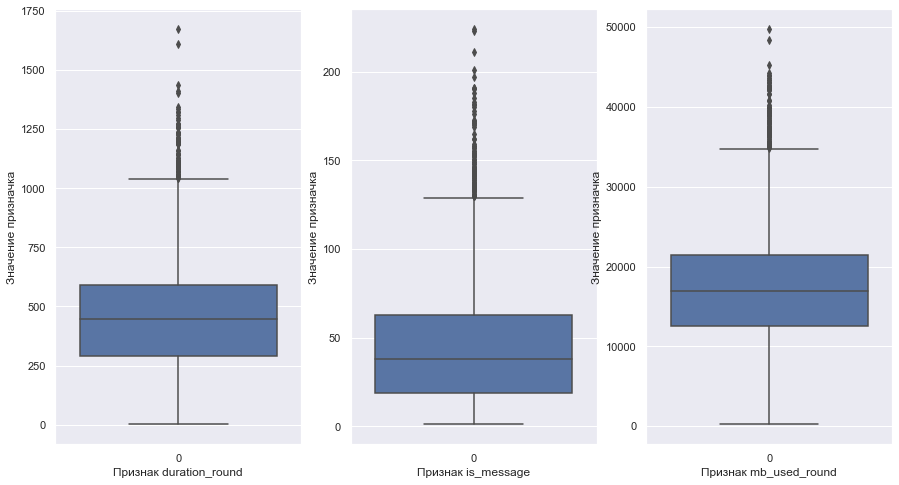

In [35]:
def boxplot_render(_df):
    fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))
    #_list_seasons = {'weekday':7, 'month':12, 'year':6}
    _count=0
    for i,column in enumerate(column_names):
        #через bar не получается вывести, постоянно виснет, не понимаю как через него сделать
        #data.plot(y=season,kind='hist',ax=axes[_count],bins=quant*2)
        ax = sns.boxplot(data=_df[column],ax=axes[_count])
        ax.set(xlabel='Признак '+column,\
           ylabel= 'Значение призначка',
         );
        _count +=1
    plt.show()   
boxplot_render(df_hist)
#boxplot_render(df_hist[df_hist['tariff']=='ultra'])
#почему-то не отрисовывает
#boxplot_render(df_hist[df_hist['tariff']=='smart'])


Проанализируем на диаграмме размаха рассояние от медианы до квартилей о определим скошенность датасэта:
- по вермени разговора заметим что датасэт совсем немного скошен вправо. Медиана по середине. Можно сказать что набор данных подчиняется закону нормального распределения.
- По СМСкам видно что датасэт скошен вправо и медиана не  находится в середие ящика. Данные не подчинены нормальному распределению
- По мегабайтам все отлично, нет скошенности выборки.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


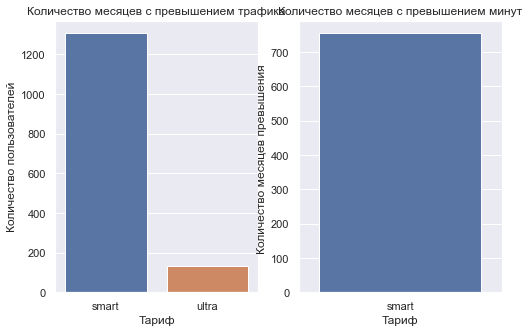

In [36]:
internet_exceed = df_hist[df_hist['internet_exceed']>0]
minutes_exceed = df_hist[df_hist['minutes_exceed']>0]
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
ax1 = sns.countplot(internet_exceed["tariff"], ax=axes[0]);
ax2 = sns.countplot(minutes_exceed["tariff"], ax=axes[1]);
ax1.set(title = 'Количество месяцев с превышением трафика',\
      xlabel='Тариф',ylabel = 'Количество пользователей')
ax2.set(title = 'Количество месяцев с превышением минут',\
      xlabel='Тариф',ylabel = 'Количество месяцев превышения ')
plt.show()

Можно сделать вывод что по ultra всем хватает пакета, но и цена у него тоже высокая

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

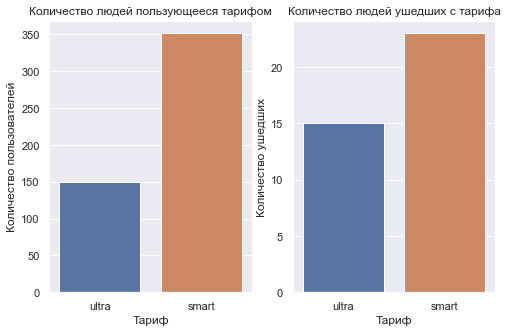

In [37]:
user_churn = users[users['churn_date']>'2017-01-01']
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
ax1 = sns.countplot(users["tariff"], ax=axes[0]);
ax2 = sns.countplot(user_churn["tariff"], ax=axes[1]);
ax1.set(title = 'Количество людей пользующееся тарифом',\
      xlabel='Тариф',ylabel = 'Количество пользователей')
ax2.set(title = 'Количество людей ушедших с тарифа',\
      xlabel='Тариф',ylabel = 'Количество ушедших')
plt.show


Количество пользующихся тарифом `smart` больше, но на тарифе `ultra` больше процент оттока клиентов.

<font color='blue'><b>Комментарий ревьювера</b></font> \
<font color='green'>Ты молодец! Переходим к терверу

### Шаг 4. Проверка гипотезы.  <a id="35"></a>

Сформулируем гипотезы:
- $H_0$ - средняя выручка пользователей тарифов "Смарт" и "Ультра" не различается
- $H_1$ - средняя выручка пользователей тарифов "Смарт" и "Ультра" различается

В качестве критерий  для проверки гипотезы будем использовать уровень значимости.

Уровень значимости возьмем 1% . Т.к. размер выборки довольно большой и мы имеем возможность увеличить точность принятия или отвержения гипотезы.Доверительный интервал в нашем случае будет составлять 99%.

In [39]:
ultra_pay_mean = df_hist[df_hist['tariff']=='ultra']['overall_pay']
smart_pay_mean = df_hist[df_hist['tariff']=='smart']['overall_pay']
# проверим равенство дисперсий выборок
print(np.var(smart_pay_mean),np.var(ultra_pay_mean))
alpha = .01 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
    smart_pay_mean, 
    #Дисперсии неравны, значит, нужно использовать параметр ```equal_var=False```
    ultra_pay_mean,equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue< alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

619299.6984085474 126464.39719956936
p-значение: 1.5197141679794384e-296
Отвергаем нулевую гипотезу


Статистический тест стьюдента t-test показал нам что наше предположение было не верно и средняя выруча по пользователям различается. Полученное значение p в -213 степени, что означает что вероятность ошибки крайне мала.

Сформулируем другую гипотезу:
- $H_0$ - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
- $H_1$ - ссредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

В качестве критерий  для проверки гипотезы будем использовать уровень значимости.

Уровень значимости возьмем 1% $\alpha=0.01$ . Т.к. количество степеней свободы довольно большое и мы имеем возможность увеличить точность принятия или отвержения гипотезы.Доверительный интервал в нашем случае будет составлять 99%.

In [ ]:
MSK = df_hist[df_hist['city']=='Москва']['overall_pay']
no_MSK = df_hist[df_hist['city']!='Москва']['overall_pay']
# проверим равенство дисперсий выборок
print(np.var(MSK),np.var(no_MSK))
alpha = .01 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
    MSK, 
    no_MSK)
print('p-значение:', results.pvalue)
if (results.pvalue< alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Мы приняли нулевую гипотезу, но с вероятностью в 41% мы можем сказать что средняя выручка не отличается от выручки пользователей в других регионах. К сожалению этого уровня значимости недостаточно, чтобы заявить что пользователи из Москвы платят за связь больше.

In [ ]:
#Перепроверим результаты выдвинутых нами гипотиз
#посчитаем среднюю выручку по тарифам
def calculate_expances(_df):
    ultra_pay_mean = _df[_df['tariff']=='ultra']['overall_pay'].mean()
    smart_pay_mean = _df[_df['tariff']=='smart']['overall_pay'].mean()
    print(ultra_pay_mean)
    print(smart_pay_mean)
    #посмотрим сколько переплачивают пользователи
    print(ultra_pay_mean-1950)
    print(smart_pay_mean-550)
calculate_expances(df_hist)

Средняя выручка по тарифу `ultra` составляет 2059 рублей, а по тарифу `smart` 1197 рублей. Оно и понятно что плата по тарифу `ultra` 1950.
Сколько же в среднем переплачивают наши пользователи?
- По тарифу `ultra` пользователи переплачивают всего 109 рублей
- А вот по тарифу `smart` у некоторых пользователей идут большие переплаты. В среднем размер переплаты составляет 647 рублей. При учете что кто-то очень переплачивает, а кто то укладывается в лимиты. Части пользователей нужно будет задуматься о смене тарифа.

In [ ]:
# расходы по москве и регионах
calculate_expances(df_hist[df_hist['city']=='Москва'])
print('Расходы по россии')
calculate_expances(df_hist[df_hist['city']!='Москва'])

Как неудивительно, но мы не увидели разницы в расходах пользовалей между москвой и регионами. Возможно с отменой роуминга цены на тарифы выровнялись по стране?
Интересен тот факт что москвичи переплачивают в среднем меньше чем другие наши сограждане. Возможно в Москве больше считают деньги 

### Шаг 5.  Общий вывод <a id="45"></a>

Мы  сделали предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении были данные 500 пользователей «Мегалайна».

__Исправли__
- т.к. тарфикация идет по целым секундам, мы округлили длинну звонков
- длительность многих звонков — 0.0 минут, мы не стали ее удалять.
- выяcнили что пропущенные входящие искажают выборку, но это повод посмотреть кто не берет трубки. В дальнейшем можно использовать эту информацию

__Вычислили__
-	количество сделанных звонков и израсходованных минут разговора по месяцам;
-	количество отправленных сообщений по месяцам;
-	объем израсходованного интернет-трафика по месяцам;
-	помесячную выручку с каждого пользователя. Выяснили, сколько переплачивает пользователь каждый месяц.
__Мы подготовили данные для дальнейшей обработки__
- Агрегировав разарозненные данные и добавив новыеметрики: количество звонков, минут, гигабайт за месяц для каждого пользователя.
- Посчитали сколько переплачивает каждый месяц пользователь
- Сколько пользователь платит в ообщем с учетом абонентской платы по тарифу.

- При анализе продолжительности звонков у тарифа ultra небыло перерасходов. Можно сделать вывод что по ultra всем хватает пакета

- отток клиентов с тарифа ультра в процентном больше чем у смарта. Возможно цена траифа ультра немного завышена.


Средняя выручка по тарифу `ultra` составляет 2059 рублей, а по тарифу `smart` 1197 рублей. Оно и понятно что плата по тарифу `ultra` 1950.
Сколько же в среднем переплачивают наши пользователи?
- По тарифу `ultra` пользователи переплачивают всего 109 рублей
- А вот по тарифу `smart` у некоторых пользователей идут большие переплаты. В среднем размер переплаты составляет 647 рублей. При учете что кто-то очень переплачивает, а кто то укладывается в лимиты. Части пользователей нужно будет задуматься о смене тарифа.

В январе и феврале абоненты говорили по телефону меньше. В январе с тарифом `смарт` говорили 200 минут, а с `ultra` 400. В феврале абоненты обоих тарифов говорили примерно одинаково. В среднем, разница между тарифами по месяцам составляет 100-150 минут

Активность в первые месяцы опять проседает. Опять в январе пользователи тарифа `smart` показывают пониженную активность. Может у людей нет денег или они на отдыхе где не нужно отправлять смс. В среднем, на тарифе `ultra` отправляют на 10-30 смс больше чем на `smart`. К конц года разница начинает немного расти.

По трафику по месяцам не такое заметное проседание. Может люди не могут отказать себе в социальных сетях. Но все же есть кому интернет нужен и по работе, поэтому январь-февраль небольшой спад активности. Как ни странно разница между тарифами 3-5 гигабайт. Может зря переплачивают пользователи тарифа `ultra`, а может кто-то из тарифа `smart` не правильно подобрал себе тариф и платит деньги за дополнительные гигабайты?

У компании нет еще постоянных клиентов (только 40 пользователей пользовались связью весь год),
но и сказать что пользователи покупают симки и сразу выкидывают - тоже нельзя. Скорее всего простоянные пользователи - в середине, т.к. пользуются связью не с начала года.

Мы так же выяснили:
- Статистический тест стьюдента t-test показал нам что наше предположение было не верно и средняя выруча по пользователям различается.
- средняя выручка пользователей из Москвы не отличается от выручки пользователей из других

Нельзя однозначно сказать какой тариф лучше, возможно оператору нужно расширить линейку тарифов.